### Question 1 : Implement the intensity transformation

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)

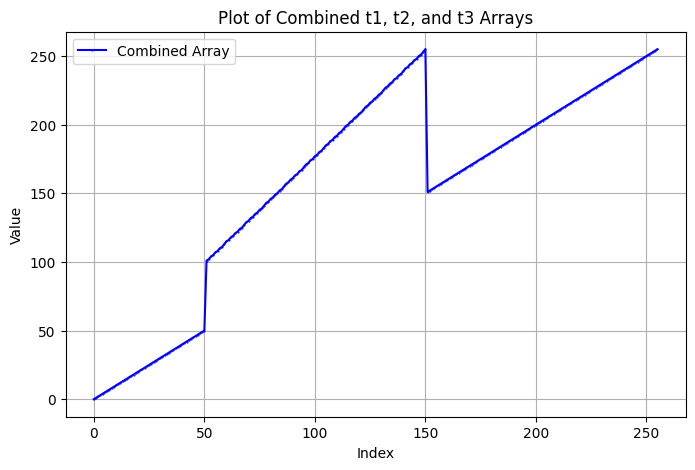

In [2]:
d = np.array([(50,50),(50,100),(150,255),(150,150)])
t1= np.linspace(0,d[0,1],d[0,0]+1).astype(np.uint8)         
t2= np.linspace(d[1,1]+1,d[2,1],d[2,0]-d[1,0]).astype(np.uint8)     
t3= np.linspace(d[3,1]+1,255,255-d[3,0]).astype(np.uint8)   
transformation = np.concatenate((t1,t2,t3)).astype(np.uint8)
# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(transformation, label='Combined Array', color='b', marker='.', markersize=1)
plt.title('Plot of Combined t1, t2, and t3 Arrays')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Question 2 :Applying internsity transformation for brain proton density image

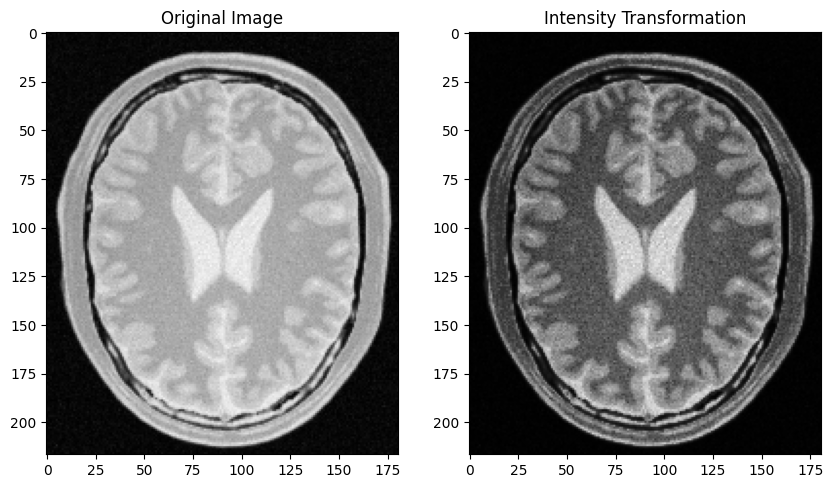

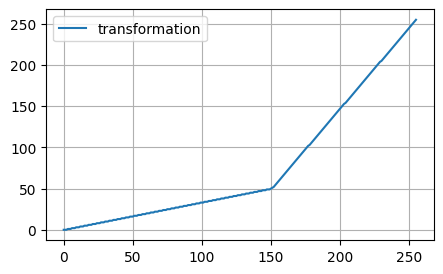

In [52]:
f = cv.imread("a1images/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)

d = np.array([(150,50)])

t1= np.linspace(0,d[0,1],d[0,0]+1).astype(np.uint8)             
t2= np.linspace(d[0,1]+1,255,255-d[0,0]).astype(np.uint8)       


transformation = np.concatenate((t1,t2)).astype(np.uint8)
image_transformed = cv.LUT(f,transformation)
fig1,ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(image_transformed,cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformation')
fig2,ax1 = plt.subplots(1, 1, figsize=(5, 3))
ax1.plot(transformation, label='transformation')
ax1.legend()
# Add grid
ax1.grid(True)
# Ensure layout is tight
 
plt.show()

White Matter Intensity: 170
Gray Matter Intensity: 197


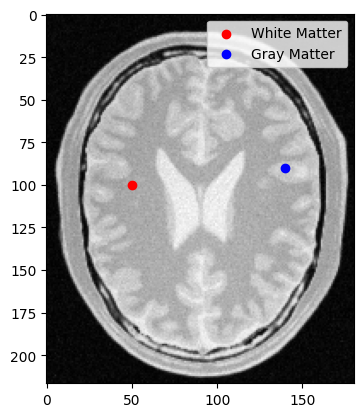

In [97]:
white_matter_point = 50, 100
gray_matter_point = 140, 90

# Show the points in the brain proton density image
plt.imshow(f, cmap="gray")
plt.scatter(white_matter_point[0], white_matter_point[1], color='red', label='White Matter')
plt.scatter(gray_matter_point[0], gray_matter_point[1], color='blue', label='Gray Matter')
plt.legend()

# Get pixel values
white_matter_intensity = f[white_matter_point]
gray_matter_intensity = f[gray_matter_point]

# Print pixel values
print(f"White Matter Intensity: {white_matter_intensity}")
print(f"Gray Matter Intensity: {gray_matter_intensity}")

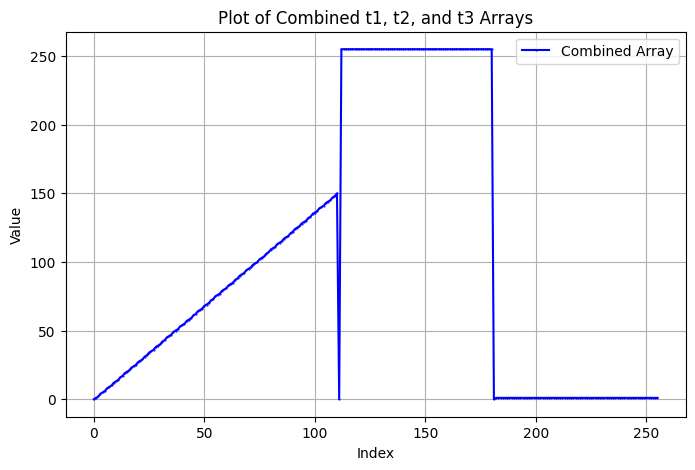

In [93]:
f = cv.imread("a1images/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
d = np.array([(110,150),(110,255),(180,255),(180,255)])
t1= np.linspace(0,d[0,1],d[0,0]+1).astype(np.uint8)         
t2= np.linspace(d[1,1]+1,d[2,1],d[2,0]-d[1,0]).astype(np.uint8)     
t3= np.linspace(d[3,1]+1,255,255-d[3,0]).astype(np.uint8)   
transformation = np.concatenate((t1,t2,-t3)).astype(np.uint8)
# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(transformation, label='Combined Array', color='b', marker='.', markersize=1)
plt.title('Plot of Combined t1, t2, and t3 Arrays')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

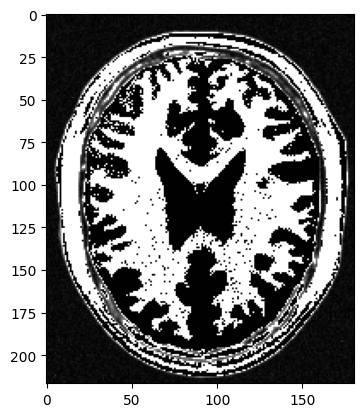

In [94]:
image_transformed = cv.LUT(f,transformation)
plt.imshow(cv.cvtColor(image_transformed,cv.COLOR_BGR2RGB))

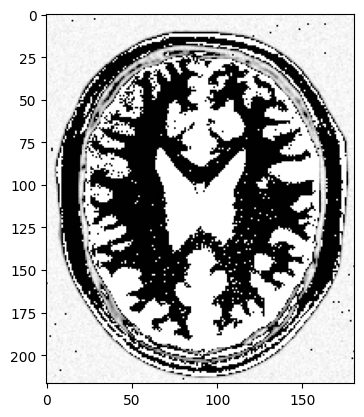

In [95]:
image_transformed = cv.LUT(f,-transformation)
plt.imshow(cv.cvtColor(image_transformed,cv.COLOR_BGR2RGB))

## Question 3 

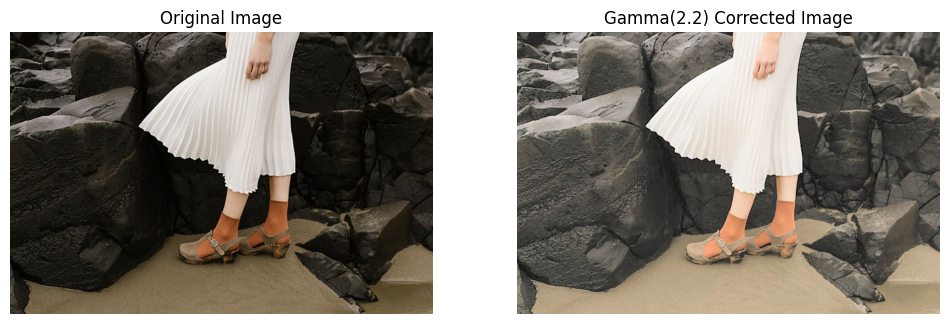

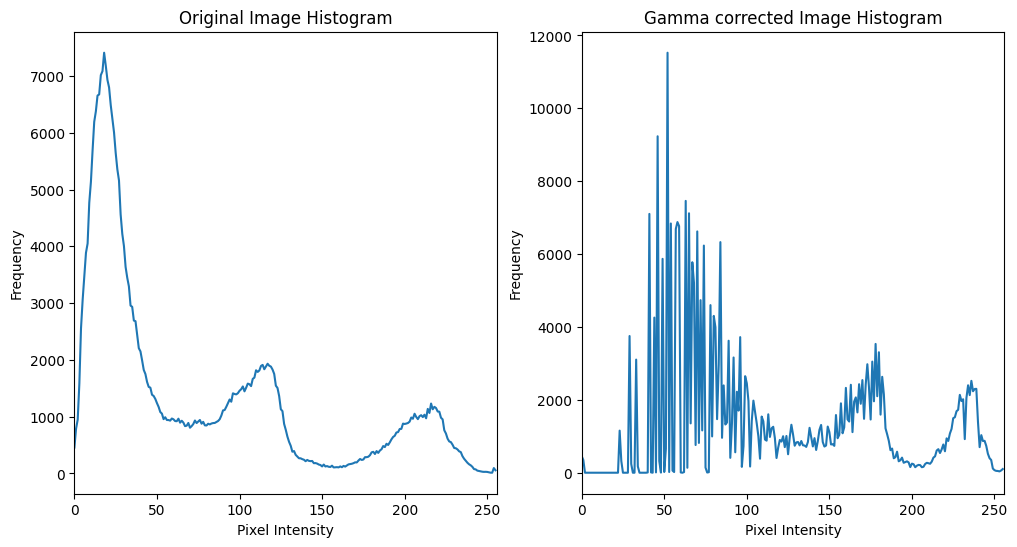

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'a1images/highlights_and_shadows.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
# Split LAB into L, A, and B channels
L, A, B = cv2.split(lab_image)
# Gamma correction parameters
gamma = 2.2
gamma_correction = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
# Apply gamma correction to the L channel
L_corrected = cv2.LUT(L, gamma_correction)
# Merge the corrected L channel back with A and B
lab_corrected = cv2.merge([L_corrected, A, B])
# Convert the corrected LAB image back to BGR color space
corrected_image = cv2.cvtColor(lab_corrected, cv2.COLOR_Lab2BGR)

# Display the original and gamma-corrected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gamma(2.2) Corrected Image')
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
 

image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
corrected_image_grayscale = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY) 


# Plot histograms
plt.figure(figsize=(12, 6))
# Calculate histogram using OpenCV's calcHist function
histogram1 = cv2.calcHist([image_grayscale], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist([corrected_image_grayscale], [0], None, [256], [0, 256])

# Plot the histogram
plt.subplot(1, 2, 1)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(histogram1)
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.title('Gamma corrected Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(histogram2)
plt.xlim([0, 256])


plt.show()


 

## Question 4 

In [2]:
import cv2
# Load the image
image_path = 'a1images/spider.png'
image = cv2.imread(image_path)

# Convert the image from BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Split the HSV image into H, S, and V channels
H, S, V = cv2.split(hsv_image)

In [5]:
print(H.shape)
a=0.4
sigma = 70
S1 = np.minimum(S + a * 128 * np.exp(-(S - 128)**2 / (2 * sigma**2)), 255).astype(np.uint8)

(438, 780)


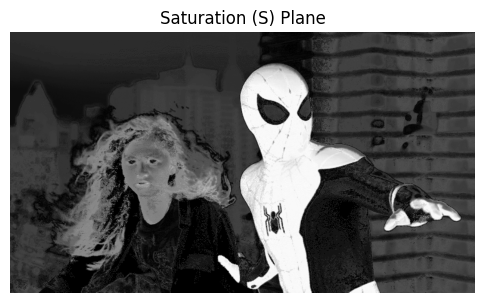

In [6]:
# Plot the S channel (Saturation plane)
plt.figure(figsize=(6, 6))
plt.imshow(S, cmap='gray')  # Display the H channel as a grayscale image
plt.title('Saturation (S) Plane')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()

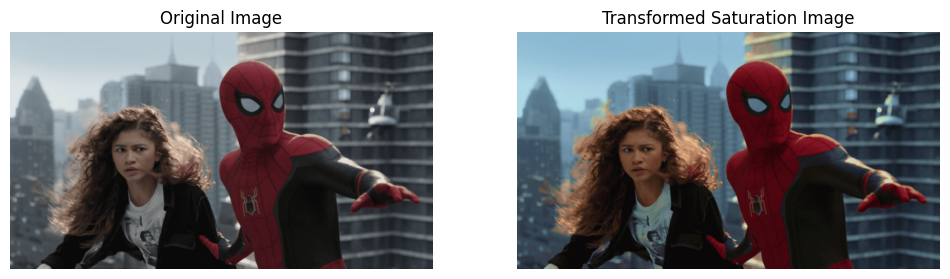

In [46]:

# Combine the transformed H channel with the original S and V channels
transformed_hsv_image = cv2.merge([H, S1, V])

# Convert the transformed HSV image back to BGR color space
transformed_image = cv2.cvtColor(transformed_hsv_image, cv2.COLOR_HSV2BGR)

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Saturation Image')
plt.axis('off')

plt.show()

In [47]:
t = np.arange(256, dtype=np.uint8)
g = np.minimum(t + a * 128 * np.exp(-(t - 128)**2 / (2 * sigma**2)), 255)


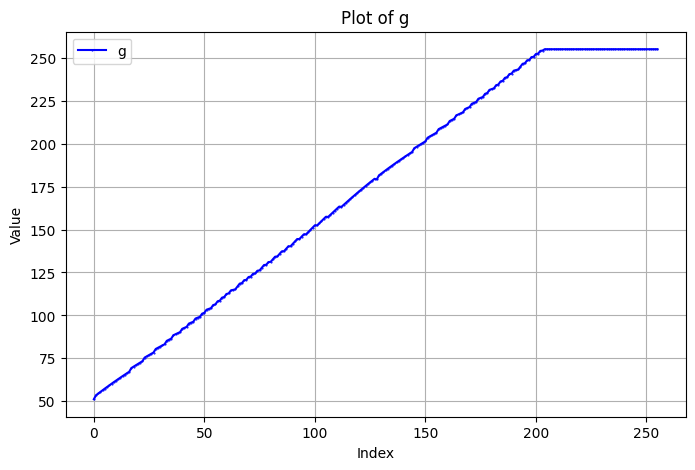

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(g, label='g', color='b', marker='.', markersize=1)
plt.title('Plot of g')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Question 5

## Question 6

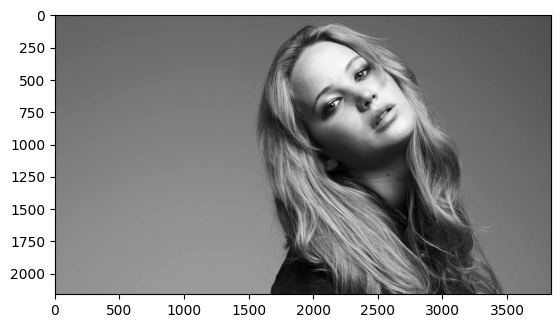

In [16]:
import cv2 
image = cv2.imread('a1images/jeniffer.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap='gray')

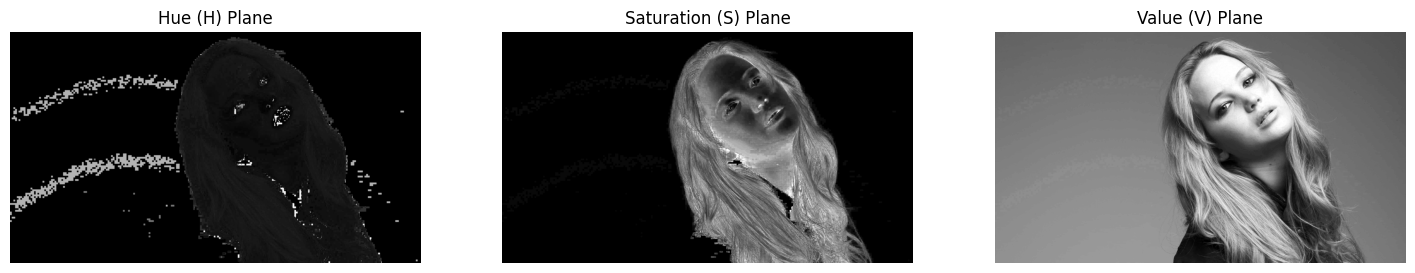

In [10]:

hsv_image  = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv_image)

plt.figure(figsize=(18, 6))

# Plot the H channel (Hue plane)
plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray')
plt.title('Hue (H) Plane')
plt.axis('off')

# Plot the S channel (Saturation plane)
plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title('Saturation (S) Plane')
plt.axis('off')

# Plot the V channel (Value plane)
plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title('Value (V) Plane')
plt.axis('off')

plt.show()


## Question 7

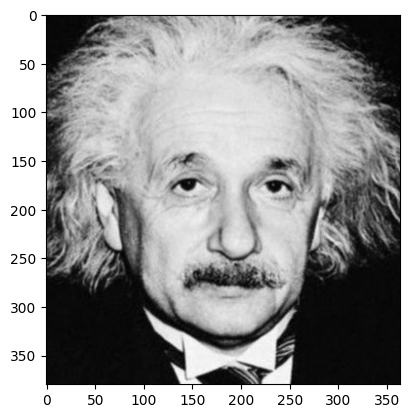

In [31]:
import cv2 
image = cv2.imread('a1images/einstein.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

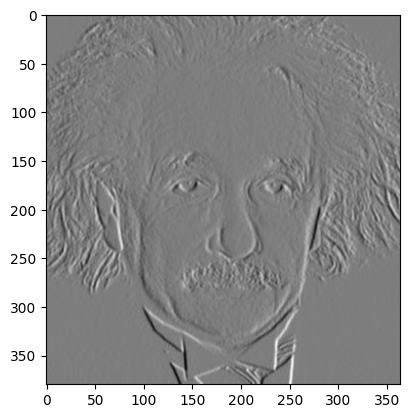

In [32]:
sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
filtered_image = cv2.filter2D(image, cv2.CV_64F, sobel_filter)
plt.imshow(filtered_image, cmap='gray')

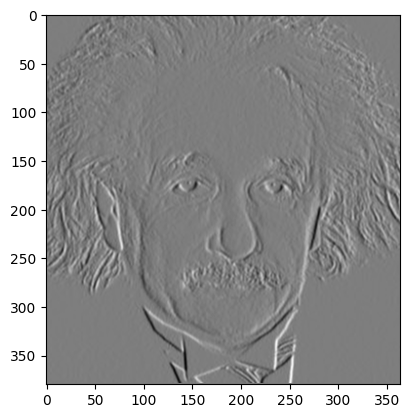

In [33]:
height, width = image.shape    
 # Create an output image to store the result
output = np.zeros_like(image, dtype=np.float64)
# Apply the kernel
for i in range(1, height-1):
    for j in range(1, width-1):
        # Perform convolution
         region = image[i-1:i+2, j-1:j+2]
         output[i, j] = np.sum(region * sobel_filter )         
plt.imshow(output, cmap='gray')
    

In [28]:
array1=np.array([[1, 2, 1]])
array2=np.array([[1,0,-1]])
# Reshape into a column vector
column_array1 = array1.reshape(-1, 1)
print(column_array1)
print(array2)
column_array1.shape


[[1]
 [2]
 [1]]
[[ 1  0 -1]]


(3, 1)

C:\Users\User\AppData\Local\Temp\ipykernel_15580\2989269540.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  row_filtered_image[i, j] = np.dot(array2, image[i, j-pad:j+pad+1]).astype(np.float64)
C:\Users\User\AppData\Local\Temp\ipykernel_15580\2989269540.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output_image[i, j] = np.dot(array1, row_filtered_image[i-pad:i+pad+1, j]).astype(np.float64)


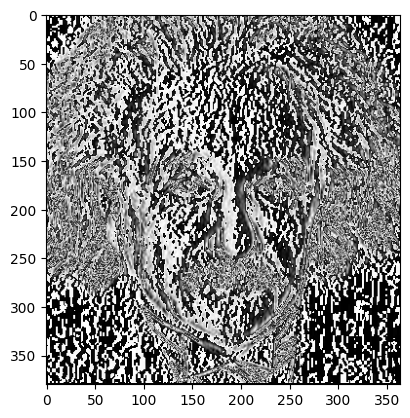

In [37]:
array1=np.array([[1, 2, 1]])
array2=np.array([[1,0,-1]])
# Initialize output for the row and final output
row_filtered_image = np.zeros_like(image)
output_image = np.zeros_like(image)
# Get image dimensions
height, width = image.shape
filter_size = len(column_array1)
pad = filter_size // 2  # Padding based on filter size
# 1. Horizontal convolution (row-wise)
for i in range(height):
    for j in range(pad, width - pad):
        # Apply filter using np.dot for horizontal convolution
        row_filtered_image[i, j] = np.dot(array2, image[i, j-pad:j+pad+1]).astype(np.float64)
# 2. Vertical convolution (column-wise)
for j in range(width):
    for i in range(pad, height - pad):
        # Apply filter using np.dot for vertical convolution
        output_image[i, j] = np.dot(array1, row_filtered_image[i-pad:i+pad+1, j]).astype(np.float64)     
plt.imshow(output_image,cmap='gray')

In [8]:
# Load an image (replace 'image.jpg' with your image file)
image_original = cv2.imread('a1images/a1q5images/im01.png')
image_zoomed_out = cv2.imread('a1images/a1q5images/im01small.png')


Normalized SSD (Nearest-Neighbor): 31.284316486625514
Normalized SSD (Bilinear Interpolation): 39.257033179012346


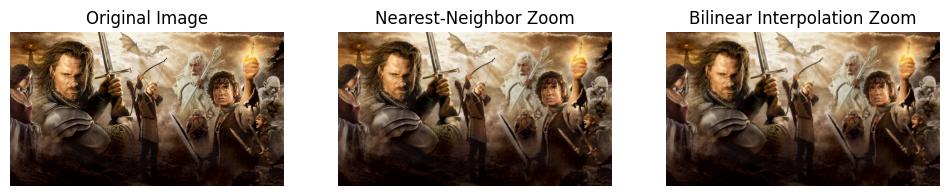

In [10]:
import cv2
import numpy as np

def nearest_neighbor_zoom(image, scale_factor):
    """Zoom the image using nearest-neighbor interpolation."""
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale_factor), int(width * scale_factor)    
    # Create an empty array for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)
    for i in range(new_height):
        for j in range(new_width):
            # Find the nearest pixel from the original image
            orig_x = min(int(i / scale_factor), height - 1)
            orig_y = min(int(j / scale_factor), width - 1)
            zoomed_image[i, j] = image[orig_x, orig_y]
    return zoomed_image

def bilinear_interpolation_zoom(image, scale_factor):
    """Zoom the image using bilinear interpolation."""
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale_factor), int(width * scale_factor)
        # Create an empty array for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)
    for i in range(new_height):
        for j in range(new_width):
            # Find the position of the pixel in the original image
            x = i / scale_factor
            y = j / scale_factor          
            # Get the four surrounding pixels for bilinear interpolation
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, height - 1), min(y1 + 1, width - 1)
            # Interpolation weights
            a = x - x1
            b = y - y1
            # Compute the interpolated value
            pixel_value = (1 - a) * (1 - b) * image[x1, y1] + \
                          a * (1 - b) * image[x2, y1] + \
                          (1 - a) * b * image[x1, y2] + \
                          a * b * image[x2, y2]
            zoomed_image[i, j] = pixel_value
    return zoomed_image

def zoom_image(image, scale_factor, method='nearest'):
    """Zoom the image using the specified method."""
    if method == 'nearest':
        return nearest_neighbor_zoom(image, scale_factor)
    elif method == 'bilinear':
        return bilinear_interpolation_zoom(image, scale_factor)
    else:
        raise ValueError("Invalid method! Choose either 'nearest' or 'bilinear'.")
    
    
def compute_ssd(original, zoomed):
    """Compute the sum of squared differences (SSD) between two images."""
    ssd = np.sum((original - zoomed) ** 2)
    normalized_ssd = ssd / original.size  # Normalize by the number of pixels
    return normalized_ssd

# Zoom factor (change the zoom factor as needed)
scale_up_factor = 4
zoomed_nearest = zoom_image(image_zoomed_out, scale_up_factor, method='nearest')

# Zoom back up by a factor of 4 using bilinear interpolation
zoomed_bilinear = zoom_image(image_zoomed_out, scale_up_factor, method='bilinear')

# Compute the SSD for nearest-neighbor interpolation
ssd_nearest = compute_ssd(image_original, zoomed_nearest)
print(f"Normalized SSD (Nearest-Neighbor): {ssd_nearest}")

# Compute the SSD for bilinear interpolation
ssd_bilinear = compute_ssd(image_original, zoomed_bilinear)
print(f"Normalized SSD (Bilinear Interpolation): {ssd_bilinear}")

# Display the original and zoomed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(zoomed_nearest, cv2.COLOR_BGR2RGB))
plt.title('Nearest-Neighbor Zoom')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Bilinear Interpolation Zoom')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()


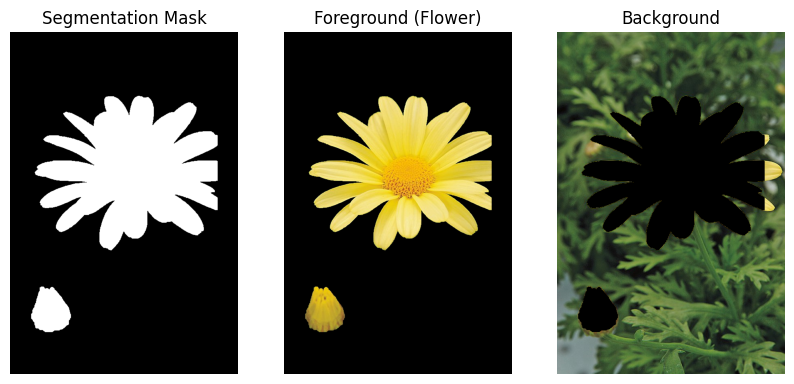

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image (replace 'flower.jpg' with the path to your image)
image = cv2.imread('a1images/daisy.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper plotting

# Step 2: Initialize the mask and GrabCut parameters
mask = np.zeros(image.shape[:2], dtype=np.uint8)  # Mask initialized to zero
bgd_model = np.zeros((1, 65), np.float64)  # Background model
fgd_model = np.zeros((1, 65), np.float64)  # Foreground model

# Define a rectangle around the flower for GrabCut initialization
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)  # Adjust these values as necessary

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask so that foreground and probable foreground are treated as foreground
mask_fg = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)

# Extract the foreground image
foreground = image * mask_fg[:, :, np.newaxis]

# Extract the background by inverting the mask
mask_bg = 1 - mask_fg
background = image * mask_bg[:, :, np.newaxis]

# Step 3: Create the enhanced image by blurring the background
blurred_background = cv2.GaussianBlur(image, (21, 21), 0)
enhanced_image = foreground + blurred_background * mask_bg[:, :, np.newaxis]

# Display the results
plt.figure(figsize=(10, 10))

'''plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
'''
plt.subplot(1, 3, 1)
plt.imshow(mask_fg, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground (Flower)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Background')
plt.axis('off')

plt.show()



(-0.5, 560.5, 840.5, -0.5)

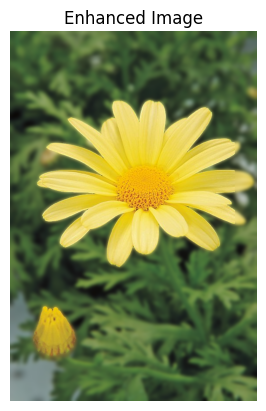

In [13]:
plt.